# Gradient Descent

**Gradient Descent is the most important algorithm in Machine Learning.**

| concept | description |
|:-------:|:-----------:|
| Gradient Descent | iterative algorithm to find optimal parameters | 
| Gradient | partial differential over all features | 
| Loss function | the function that is optimized | 
| Learning rate | factor that determines the size of steps | 
| Stochastic Gradient Descent | variant using randomly selected points | 
| Mini-Batch Gradient Descent | variant using random samples of points | 

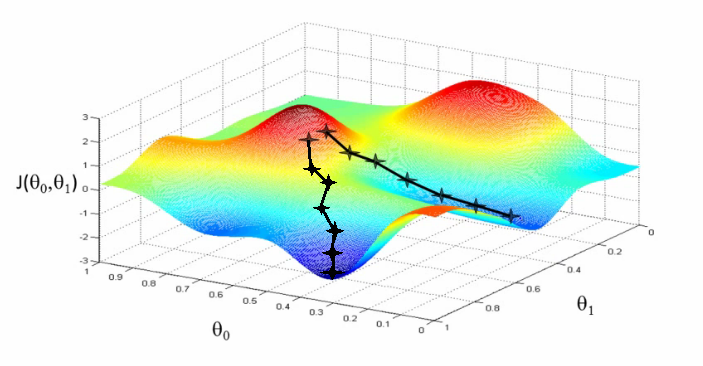

GD is used to fit the parameters of a model. More technically, GD finds the minimum of a function in a parameter space.

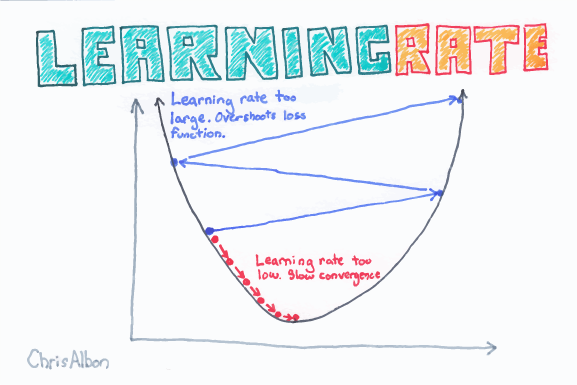

In Gradient Descent, the location in the parameter space is modified according to the gradient of the loss function multiplied by the learning rate.

The learning rate is a number that influences how far the algorithm moves along the gradient.

The gradient is the slope of a function in multiple dimensions. Technically, the gradient of a function f(x) is a vector containing all its partial derivatives at the point x.

**We start with a random line and we can tweak two things ulimately - slope(gradient) and the intercept.**

**We work out the loss function, MSE (in the case of Linear Regression)** - if it's high it's bad, if it's small that's good!

To get the best accuracy, we want to minimise the loss! In this case, if you **minimise your Mean Square Error, you maximise your accuracy!**

### Loss Functions

The minimized function is called the loss function. It depends on the optimization problem, typically:

- MSE in linear regression
- log-loss in binary classification
- crossentropy in multinomial classification
- hinge loss in SVMs.

Many applications (especially in Deep Learning) use their own, custom loss functions.

### Importance of Scaling Features
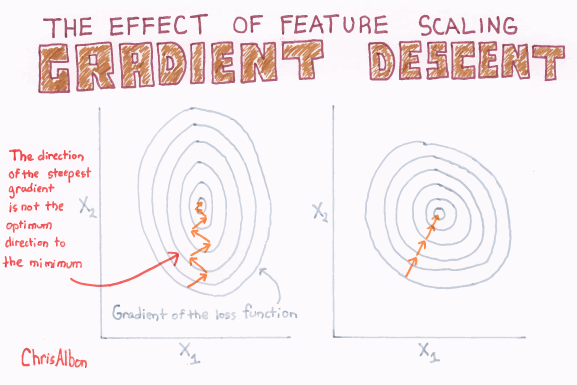
Gradient Descent will take longer if features are not similarly scaled.

Andrew Ng’s rule of thumb says that if the features range from -3 to +3 it is OK.

### What if we have lots of data? 

In GD, all data points need to be considered to calculate the gradient. This will become slow when the dataset is big.

The solution is to use **Stochastic Gradient Descent (SGD)**, where one randomly chosen data point is used at a time. The variant **Batch Gradient Descent** using randomly chosen subsets is the default when training neural networks.

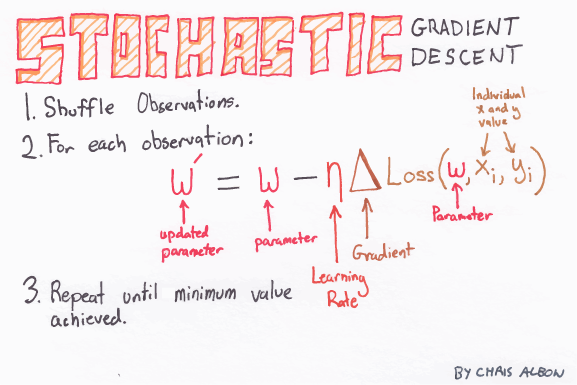

## Exercise
- We're going to do our own gradient descent from scratch:

In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Xtrue = [randint(1, 100) *0.01 for i in range(2000)]

# we have 2000 datapoints and 2 features - slope and intercept

In [3]:
#more or less in the shape of y = mx + b - x is the data point, m =2, b = -1.5
# only two things we can do to change this - change the slope or move intercept up or down

TARGET_SLOPE = 2.0 
TARGET_INTERCEPT = -1.5
NOISE = 0.2
ytrue = [TARGET_SLOPE * val + TARGET_INTERCEPT + np.random.normal(-NOISE, NOISE) for val in Xtrue]

Text(0, 0.5, 'ytrue')

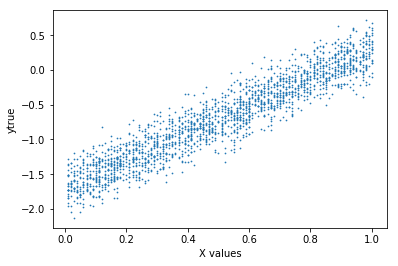

In [4]:
plt.scatter(Xtrue, ytrue, s = 0.5)
plt.xlabel('X values')
plt.ylabel('ytrue')

### 1. Create a line:

The way the gradient descent algorithm works is that it tries to tweak / optimize the parameters of a function (e.g. a machine learning model) in such a way that the error between the output of that function (i.e. ypred) and the actual values (i.e. ytrue) is minimized.

In this simple example, we are going to assume a linear function (y = mx + b) - even if it's terrible - to approximate our data set, which means we have 2 parameters we can tweak:

1. the slope (m);
2. and the y-intercept (b)

\begin{align}
y = mx + b
\end{align}

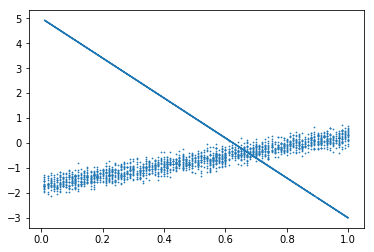

In [6]:
#for x in Xtrue:
    # slope * x + intercept

def make_line(Xtrue, slope, intercept):    
    
    return[slope * x + intercept for x in Xtrue]

ypred_bad = make_line(Xtrue, -8.0, 5.0) # random ones

# gonna plot our bad line
plt.scatter(Xtrue, ytrue, s = 0.5)
plt.plot(Xtrue, ypred_bad)

#damn, this is a really bad first attempt

We can intuitively / visually tell that the parameters m = -8.0 and b = -5.0 gave us a bad prediction / line of best fit.

But how can a computer tell that it’s “bad”?

### 2. Calculate the Loss - MSE:

We need a way of quantifying the error (or loss) between the predicted and actual values. In Machine Learning, this is referred to as a loss function. There are many we could use, but in this case let's use Mean Squared Error:

\begin{align}
MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat Y_i)^2
\end{align}

We can zip our values, the iterate through and tuple unpack, and then we can square it too!

- How bad is our line?

In [10]:
#Regular Way: Empty list + appending
#Beginners
vals = []
for yt, yp in list(zip(ytrue, ypred_bad)):
    vals.append((yt - yp) ** 2)

sum(vals) / len(ytrue)

11.002371913566455

### Now let's do this with a list comprehension:

In [11]:
#Fancy way: List comprehension
#Production

sum([(yt-yp)**2 for yt,yp in list(zip(ytrue, ypred_bad))]) / len(vals)

11.002371913566455

### Then we can wrap this in a function so we can call it multiple times!

In [20]:
def mse(ytrue, ypred):
    return sum([(yt-yp)**2 for yt,yp in list(zip(ytrue, ypred))]) / len(vals)

In [21]:
mse(ytrue, ypred_bad)

11.002371913566455

#### Now let's drastically improve our line to see how the MSE is affected:

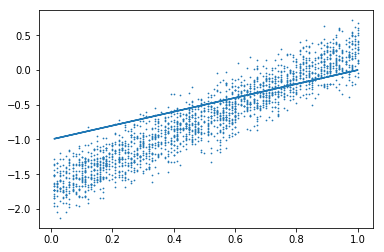

In [18]:
new_line = make_line(Xtrue, 1, -1.0) 

plt.scatter(Xtrue, ytrue, s = 0.5)
plt.plot(Xtrue, new_line)

In [22]:
mse(ytrue, new_line)

0.1607516667407592

- Now look how good that MSE is now!

### 3. Calculate the Gradient ( the derivative) and the Intercept

- In which direction should we tweak our parameters?
- If we adjust the slope a little bit, we'll get some number and that number will tell us which direction we need to go in!

The essence of gradient descent is – after determining the error between the predicted values and the actual values – deciding by how much to tweak each of the parameters in such a way that the new values for the parameters result in a smaller loss than before! So for each one of our parameters (ω), we need to calculate…

\begin{align}
\omega_{new} = \omega_{old} + \triangle\omega
\end{align}

…that makes our error smaller (i.e. makes our function more accurate) than the iteration before!

How do we calculate an appropriate change for each parameter (Δω) that achieves this objective? The delta part of the equation evaluates to:

\begin{align}
\triangle \omega = -\eta \triangledown loss(\omega)
\end{align}

The toughest part about implementing the algorithm is understanding what the ∇ loss(ω) part means. This term represents the **gradient of the loss function for each variable, ω**. Another way of saying this is **calculating the first-order partial derivatives of the loss function with respect to each of the parameters**. And since we are dealing with 2 parameters in this example (slope and intercept), we need to calculate 2 partial derivatives each time we run an iteration of the algorithm!

In [34]:
slope = -8.0
intercept = 5.0
dw = 0.001

ypred = make_line(Xtrue, slope, intercept) 
# slope and intercept will change as we run this

# Let's play around with just our first parameter
# we need a slightly different slope

slope_change = slope + dw
ypred_slope = make_line(Xtrue, slope_change, intercept) # ONLY TWEAK SLOPE
grad_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

In [35]:
grad_slope

0.0370912533647072

#### Can now do the same for intercept!

In [36]:
intercept_changed = intercept + dw
ypred_intercept = make_line(Xtrue, slope, intercept_changed) 
# ONLY TWEAKS INTERCEPT
grad_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) /dw

In [37]:
grad_intercept

3.329552596905927

In [38]:
print(f'Slope Gradient: {grad_slope: .2f}, Intercept Gradient: {grad_intercept: .2f}')

Slope Gradient:  0.04, Intercept Gradient:  3.33


In [39]:
slope = -5.0
intercept = 1.5
dw = 0.001

ypred = make_line(Xtrue, slope, intercept) 

slope_changed = slope + dw
ypred_slope = make_line(Xtrue, slope_changed, intercept) # ONLY TWEAK SLOPE
grad_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

intercept_changed = intercept + dw
ypred_intercept = make_line(Xtrue, slope, intercept_changed) # ONLY TWEAK INTERCEPT
grad_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) /dw

print(f'Slope Gradient: {grad_slope: .2f}, Intercept Gradient: {grad_intercept: .2f}')

Slope Gradient: -1.47, Intercept Gradient: -0.64


In [43]:
def get_gradients(Xtrue, ytrue, slope, intercept, dw=0.001):

    ypred = make_line(Xtrue, slope, intercept) 
    
    # Plays around with just our first parameter
    slope_changed = slope + dw
    ypred_slope = make_line(Xtrue, slope_changed, intercept)
    grad_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    # Plays around only with the second parameter
    intercept_changed = intercept + dw
    ypred_intercept = make_line(Xtrue, slope, intercept_changed)
    grad_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) /dw

    return round(grad_slope, 2), round(grad_intercept, 2)

In [44]:
get_gradients(Xtrue, ytrue, 8.0, 5.0)

(10.81, 19.47)

In [45]:
get_gradients(Xtrue, ytrue, 5.0, 2.0)

(5.76, 10.44)

### 4.  Gradient Descent

**Now we implement the Gradient Descent Algorithm:**
- Implement the gradient descent algorithm! For this, you’ll need to run a loop.


- For Loop:

\begin{align}
\omega = \omega + \triangle\omega
\end{align}

\begin{align}
\triangle\omega = - LR . \triangledown loss(\omega) 
\end{align}

LR = learning rate - tells us how far we're moving on the slope

-1 tells us we want to go down the slope

Transcribe the following pseudocode into python:

1. In each iteration of the loop, calculate the gradient of your loss function.

2. For each parameter, multiply the corresponding partial derivative by the learning rate, then negate it. Add the resulting product to the previous value of the parameter to get the updated parameter value.

3. Print all variables as you loop to make sure your parameters are converging to their expected values.

4. At the end of each iteration, overwrite the values of each parameter with its modified value.

5. Repeat the above steps `MAX_ITER` times.

6. If the gradient becomes smaller than some pre-determined threshold value, break out of the loop.

In [50]:
LR = 0.01 # Arbitrary Learning Rate
SLOPE = 8.0
INTERCEPT = 5.0

MAX_ITER = 500 

for i in range(0, MAX_ITER):
    
    grad_slope, grad_intercept = get_gradients(Xtrue, ytrue, SLOPE, INTERCEPT)
    
    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)
    
    SLOPE = SLOPE_NEW 
    INTERCEPT = INTERCEPT_NEW
    
    if i % 25 == 0:
    
        print(f'Step: {i}, Slope: {SLOPE}, INTERCEPT: {INTERCEPT}')

Step: 0, Slope: 7.8919, INTERCEPT: 4.8053
Step: 25, Slope: 5.9107, INTERCEPT: 1.2717999999999996
Step: 50, Slope: 4.843800000000001, INTERCEPT: -0.5696000000000004
Step: 75, Slope: 4.258300000000001, INTERCEPT: -1.5227000000000008
Step: 100, Slope: 3.9261000000000004, INTERCEPT: -2.0097000000000005
Step: 125, Slope: 3.7279000000000004, INTERCEPT: -2.2526000000000006
Step: 150, Slope: 3.6005, INTERCEPT: -2.3677
Step: 175, Slope: 3.5113000000000008, INTERCEPT: -2.4158999999999997
Step: 200, Slope: 3.4428000000000005, INTERCEPT: -2.4296000000000006
Step: 225, Slope: 3.385899999999998, INTERCEPT: -2.425499999999999
Step: 250, Slope: 3.3358000000000008, INTERCEPT: -2.4124999999999983
Step: 275, Slope: 3.2898000000000036, INTERCEPT: -2.3952999999999953
Step: 300, Slope: 3.246700000000004, INTERCEPT: -2.3752999999999975
Step: 325, Slope: 3.2056000000000062, INTERCEPT: -2.3552999999999997
Step: 350, Slope: 3.16580000000001, INTERCEPT: -2.335300000000002
Step: 375, Slope: 3.1283000000000087, IN

#### That was good but we can increase Learning Rate!

In [51]:
LR = 0.06
SLOPE = 8.0
INTERCEPT = 5.0

MAX_ITER = 500 

for i in range(0, MAX_ITER):
    
    grad_slope, grad_intercept = get_gradients(Xtrue, ytrue, SLOPE, INTERCEPT)
    
    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)
    
    SLOPE = SLOPE_NEW 
    INTERCEPT = INTERCEPT_NEW
    
    if i % 25 == 0: #only prints every 25 iterations
    
        print(f'Step: {i}, Slope: {SLOPE}, INTERCEPT: {INTERCEPT}')

Step: 0, Slope: 7.3514, INTERCEPT: 3.8318000000000003
Step: 25, Slope: 3.560599999999999, INTERCEPT: -2.4153999999999995
Step: 50, Slope: 3.2359999999999975, INTERCEPT: -2.3728
Step: 75, Slope: 3.0145999999999997, INTERCEPT: -2.2558000000000016
Step: 100, Slope: 2.8333999999999975, INTERCEPT: -2.1580000000000013
Step: 125, Slope: 2.684, INTERCEPT: -2.077599999999999
Step: 150, Slope: 2.5598000000000027, INTERCEPT: -2.0109999999999952
Step: 175, Slope: 2.458400000000003, INTERCEPT: -1.9557999999999949
Step: 200, Slope: 2.3768000000000007, INTERCEPT: -1.9101999999999943
Step: 225, Slope: 2.3071999999999973, INTERCEPT: -1.8741999999999928
Step: 250, Slope: 2.251999999999996, INTERCEPT: -1.8441999999999905
Step: 275, Slope: 2.2070000000000007, INTERCEPT: -1.8189999999999895
Step: 300, Slope: 2.166800000000005, INTERCEPT: -1.7985999999999898
Step: 325, Slope: 2.1368000000000085, INTERCEPT: -1.7835999999999914
Step: 350, Slope: 2.1098000000000114, INTERCEPT: -1.768599999999993
Step: 375, Slo

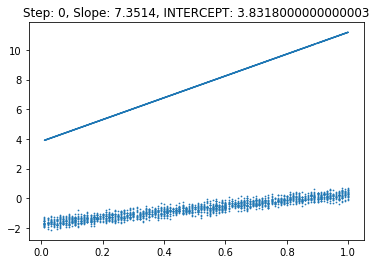

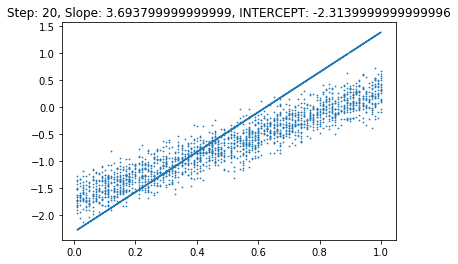

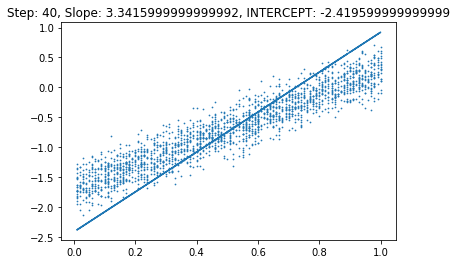

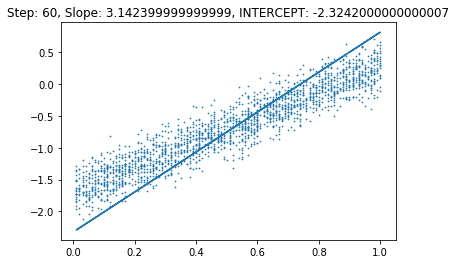

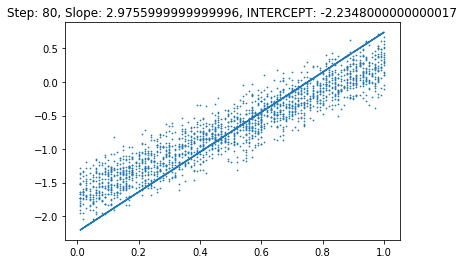

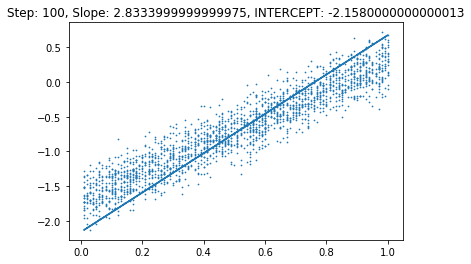

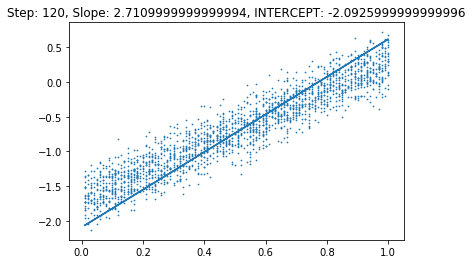

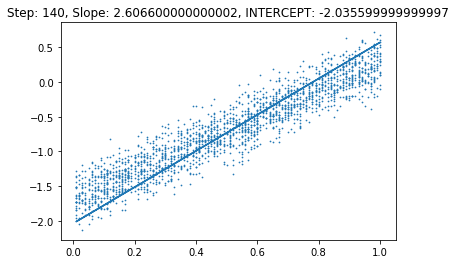

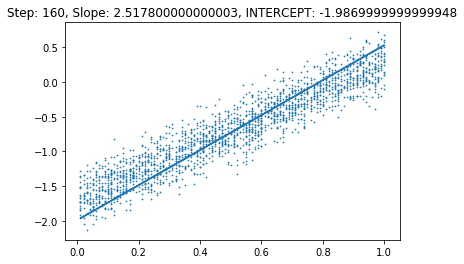

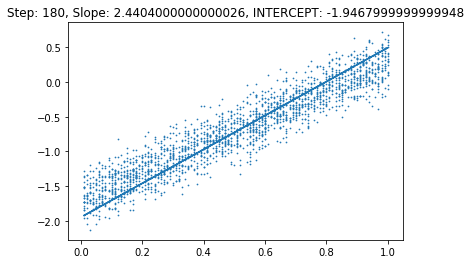

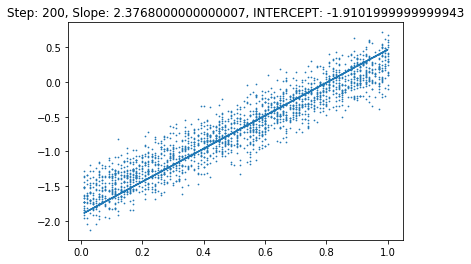

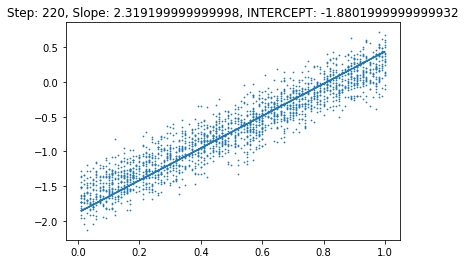

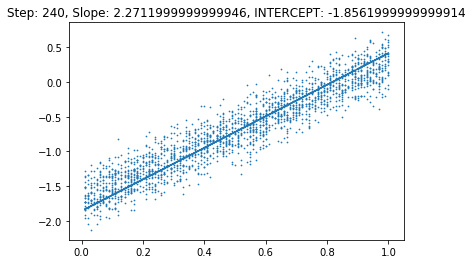

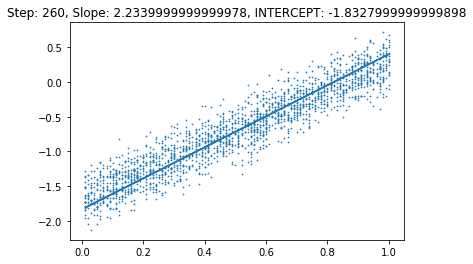

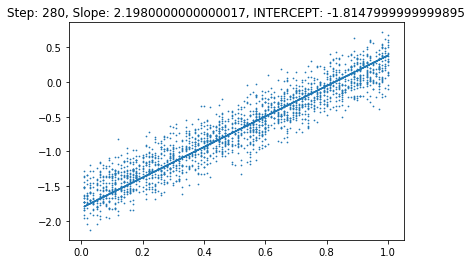

In [55]:
LR = 0.06
SLOPE = 8.0
INTERCEPT = 5.0

MAX_ITER = 300 

for i in range(0, MAX_ITER):
    
    grad_slope, grad_intercept = get_gradients(Xtrue, ytrue, SLOPE, INTERCEPT)
    
    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)
    
    SLOPE = SLOPE_NEW 
    INTERCEPT = INTERCEPT_NEW
    
    if i % 20 == 0: #only prints every 10 iterations
        
        ypred_bad = make_line(Xtrue, SLOPE, INTERCEPT)
        plt.figure()
        plt.scatter(Xtrue, ytrue, s=0.5)
        plt.plot(Xtrue, ypred_bad)
        plt.title(f'Step: {i}, Slope: {SLOPE}, INTERCEPT: {INTERCEPT}')
        

5. Plot the loss function over time.

6. Make the learning rate very small. What happens?

7. Make the learning rate very big. What happens?

8. Find the minimum of the Rastrigin function:

\begin{align}
y = x{^2} - 10 * \cos(2 * \pi * x)
\end{align}

You find more functions on en.wikipedia.org/wiki/Test_functions_for_optimization

9. Find a Gradient Descent implementation in scikit-learn and make it work.

10. Modify the implementation, so that you fit a linear function with multiple parameters.